```
Topic:        Project 4
Subject:      Clustering Ingredients used in 'Chopped'
Date:         08/21/2020
Name:         David Weon

Notebook has been cleaned using nbextension 'Code prettify'
```

# Exploratory Data Analysis

## Data Import

In [1]:
import pandas as pd
import numpy as np

In [2]:
chopped_df = pd.read_csv('data/chopped_raw.csv')

## Data Clean

In [3]:
chopped_df.head()

,season,season_episode,series_episode,episode_name,episode_notes,air_date,judge1,judge2,judge3,appetizer,entree,dessert,contestant1,contestant1_info,contestant2,contestant2_info,contestant3,contestant3_info,contestant4,contestant4_info
0,1,1,1,"""Octopus, Duck, Animal Crackers""",This is the first episode with only three offi...,"January 13, 2009",Marc Murphy,Alex Guarnaschelli,Aarón Sánchez,"baby octopus, bok choy, oyster sauce, smoked ...","duck breast, green onions, ginger, honey","prunes, animal crackers, cream cheese",Summer Kriegshauser,Private Chef and Nutrition Coach New York NY,Perry Pollaci,Private Chef and Sous chef Bar Blanc New Yo...,Katie Rosenhouse,Pastry Chef Olana Restaurant New York NY,Sandy Davis,Catering Chef Showstoppers Catering at Union...
1,1,2,2,"""Tofu, Blueberries, Oysters""",This is the first of a few episodes with five ...,"January 20, 2009",Aarón Sánchez,Alex Guarnaschelli,Marc Murphy,"firm tofu, tomato paste, prosciutto","daikon, pork loin, Napa cabbage, Thai chiles,...","phyllo dough, gorgonzola cheese, pineapple ri...",Raymond Jackson,Private Caterer and Culinary Instructor West...,Klaus Kronsteiner,Chef de cuisine Liberty National Golf Course...,Christopher Jackson,Executive Chef and Owner Ted and Honey Broo...,Pippa Calland,Owner and Chef Chef for Hire LLC Newville PA
2,1,3,3,"""Avocado, Tahini, Bran Flakes""",NaN,"January 27, 2009",Aarón Sánchez,Alex Guarnaschelli,Marc Murphy,"lump crab meat, dried shiitake mushrooms, pin...","ground beef, cannellini beans, tahini paste, ...","brioche, cantaloupe, pecans, avocados",Margaritte Malfy,Executive Chef and Co-owner La Palapa New Y...,Rachelle Rodwell,Chef de cuisine SoHo Grand Hotel New York NY,Chris Burke,Private Chef New York NY,Andre Marrero,Chef tournant L’Atelier de Joël Robuchon Ne...
3,1,4,4,"""Banana, Collard Greens, Grits""","In the appetizer round, Chef Chuboda refused t...","February 3, 2009",Scott Conant,Amanda Freitag,Geoffrey Zakarian,"ground beef, wonton wrappers, cream of mushro...","scallops, collard greens, anchovies, sour cream","maple syrup, black plums, almond butter, waln...",Sean Chudoba,Executive Chef Ayza Wine Bar New York NY,Kyle Shadix,Chef Registered Dietician and Culinary Consu...,Luis Gonzales,Executive Chef Knickerbocker Bar & Grill Ne...,Einat Admony,Chef and Owner Taïm New York NY
4,1,5,5,"""Yucca, Watermelon, Tortillas""",NaN,"February 10, 2009",Geoffrey Zakarian,Alex Guarnaschelli,Marc Murphy,"watermelon, canned sardines, pepper jack chee...","beef shoulder, yucca, raisins, ancho chiles, ...","flour tortillas, prosecco, Canadian bacon, ro...",John Keller,Personal Chef New York NY,Andrea Bergquist,Executive Chef New York NY,Ed Witt,Executive Chef / Wine Director Bloomingdale ...,Josh Emett,Chef de cuisine Gordon Ramsay at The London ...


In [4]:
meals = chopped_df.loc[:, ['appetizer', 'entree', 'dessert']]

In [5]:
#check for empty baskets
null_meals = meals[meals.isnull().any(axis=1)]
null_meals

,appetizer,entree,dessert
555,,,NaN


In [6]:
#drop empty baskets
full_meals = meals.drop([555])

In [7]:
#create dataframe of ingredients per meal type
appetizers = pd.DataFrame(
    full_meals.appetizer.str.split(',').tolist()).stack().reset_index().drop(
        ['level_0', 'level_1'], axis=1).rename(columns={0: 'appetizer'})
entrees = pd.DataFrame(
    full_meals.entree.str.split(',').tolist()).stack().reset_index().drop(
        ['level_0', 'level_1'], axis=1).rename(columns={0: 'entree'})
desserts = pd.DataFrame(
    full_meals.dessert.str.split(',').tolist()).stack().reset_index().drop(
        ['level_0', 'level_1'], axis=1).rename(columns={0: 'dessert'})

## Data Check

In [8]:
appetizers.head()
entrees.head()
desserts.head()

,dessert
0,prunes
1,animal crackers
2,cream cheese
3,phyllo dough
4,gorgonzola cheese


In [9]:
appetizers.info()
entrees.info()
desserts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   appetizer  2238 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   entree  2280 non-null   object
dtypes: object(1)
memory usage: 17.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dessert  2267 non-null   object
dtypes: object(1)
memory usage: 17.8+ KB


In [10]:
appetizers.appetizer.value_counts()
entrees.entree.value_counts()
desserts.dessert.value_counts()

 blackberries                                   13
 blueberries                                    10
 figs                                           10
 peaches                                         9
 marshmallow spread                              9
                                                ..
 bitters                                         1
 buffalo milk butter                             1
 mini chocolate bars. Neopolitan-style dough     1
 smoked brown sugar                              1
 frozen rosé                                     1
Name: dessert, Length: 1651, dtype: int64

# Preprocessing Text

In [11]:
import nltk
import re
import string

In [12]:
#text preprocessing steps - remove numbers, remove punctuation, strip end-whitespace, remove capitalization
numpunc = lambda x: re.sub('[^A-Za-z\s]+', '', x)
strip = lambda x: x.strip()
lower = lambda x: x.lower()

#text preprocessing for each meal type
appetizers['appetizer'] = appetizers.appetizer.map(numpunc).map(strip).map(
    lower)
entrees['entree'] = entrees.entree.map(numpunc).map(strip).map(lower)
desserts['dessert'] = desserts.dessert.map(numpunc).map(strip).map(lower)

#adding underscore for search in google word2vec
appetizers['appetizer'] = appetizers['appetizer'].str.replace(' ', '_')
entrees['entree'] = entrees['entree'].str.replace(' ', '_')
desserts['dessert'] = desserts['dessert'].str.replace(' ', '_')

In [13]:
#check
appetizers.loc[3, 'appetizer']
entrees.loc[1, 'entree']
desserts.loc[1, 'dessert']

'animal_crackers'

# Word2vec

## Load Model

In [14]:
import gensim
from gensim.models import Word2Vec

Google's pre-trained word embeddings can be downloaded from: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [15]:
#path to where the word2vec file lives
google_vec_file = '/Users/davidweon/davids_code/database/GoogleNews-vectors-negative300.bin'

In [16]:
#load model
model = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file,
                                                        binary=True)

## Clean/Check Data with Model

In [17]:
#putting unique ingredients into a list
unique_appetizers = [
    ingredient for ingredient in appetizers.appetizer.unique()
]
unique_entrees = [ingredient for ingredient in entrees.entree.unique()]
unique_desserts = [ingredient for ingredient in desserts.dessert.unique()]

In [18]:
def database_ingredients(unique_list):
    '''
    input: list of unique ingredients for a meal type
    output: list of ingredients that are in the google_vec database
    '''
    verified_list = []

    for ingredient in unique_list:
        try:
            model[f'{ingredient}']
            verified_list.append(ingredient)
        except:
            pass
    return verified_list

In [19]:
#list of unique ingredients that are available in google_vec database
appetizers_list = database_ingredients(unique_appetizers)
entrees_list = database_ingredients(unique_entrees)
desserts_list = database_ingredients(unique_desserts)

In [20]:
def dimensions(ingredients_list):
    '''
    input: list of ingredients that are in the google_vec database
    output: dataframe of word2vec dimensions for each ingredient
    '''
    df = pd.DataFrame([model[ingredients_list[0]]])

    #iterate through every ingredient, create one dataframe
    for ingredient in ingredients_list[1:]:
        df = pd.concat([df, pd.DataFrame([model[f'{ingredient}']])],
                       ignore_index=True)

    return df

In [21]:
#dataframe of word2vec dimension for each unique ingredient per meal type
appetizers_matrix = dimensions(appetizers_list)
entrees_matrix = dimensions(entrees_list)
desserts_matrix = dimensions(desserts_list)

In [22]:
appetizers_matrix.head()
entrees_matrix.head()
desserts_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.198242,0.304688,-0.131836,0.192383,-0.057861,-0.018799,0.292969,0.037598,-0.176758,0.400391,...,0.103516,-0.203125,0.209961,0.134766,-0.083496,0.099609,-0.447266,0.279297,0.031738,0.170898
1,-0.098633,-0.032715,0.080078,0.345703,0.349609,-0.101562,0.339844,-0.067383,-0.189453,0.099121,...,-0.013855,-0.277344,-0.257812,-0.026611,0.328125,-0.300781,0.076172,-0.169922,0.088867,-0.190430
2,-0.180664,-0.199219,0.081055,0.192383,0.333984,0.312500,0.134766,0.003189,-0.202148,0.312500,...,-0.410156,-0.148438,-0.337891,-0.042725,0.265625,-0.074707,0.087891,0.044678,0.051758,0.259766
3,-0.237305,-0.152344,0.061523,0.138672,0.119629,-0.058350,0.289062,-0.117188,-0.143555,0.406250,...,0.021729,-0.137695,-0.238281,0.052979,0.197266,0.038086,-0.004639,-0.133789,0.163086,0.161133
4,-0.275391,0.138672,-0.147461,0.527344,0.207031,0.045166,0.227539,-0.193359,-0.240234,0.117188,...,0.029053,-0.164062,-0.138672,-0.143555,0.247070,0.228516,0.094238,0.052734,0.326172,0.085938


# K-Means Clustering

## Appetizers

### Elbow Method for Optimal K

In [23]:
import sys
sys.path.append("..")

from src.models.kmeans_elbow import elbow_kplot, elbow_kvalue

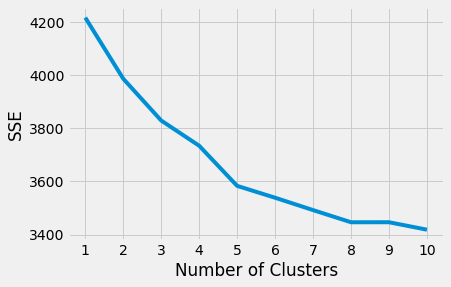

In [24]:
elbow_kplot(appetizers_matrix)

In [25]:
elbow_kvalue(appetizers_matrix)

5

### Silhouette Score for Optimal K

In [26]:
from src.models.kmeans_silhouette import silhouette_plot

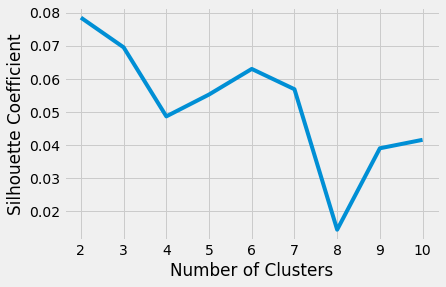

In [27]:
silhouette_plot(appetizers_matrix)

### K-Means Cluster Results

In [28]:
from sklearn.cluster import KMeans

kmeans6 = KMeans(n_clusters=6, random_state=24).fit(appetizers_matrix)

In [29]:
from src.models.cluster_items import cluster_6

In [30]:
kmeans_app1, kmeans_app2, kmeans_app3, kmeans_app4, kmeans_app5, kmeans_app6 = cluster_6(
    appetizers_list, kmeans6)

## Entrees

### Elbow Method for Optimal K

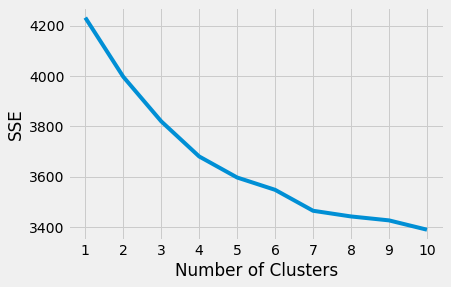

In [31]:
elbow_kplot(entrees_matrix)

In [32]:
elbow_kvalue(entrees_matrix)

4

### Silhouette Score for Optimal K

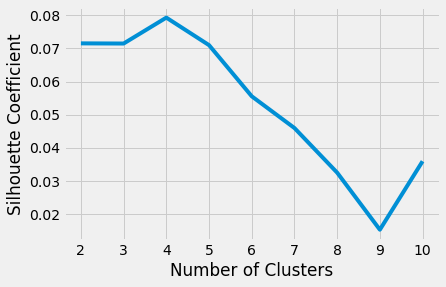

In [33]:
silhouette_plot(entrees_matrix)

### K-Means Cluster Results

In [34]:
kmeans4 = KMeans(n_clusters=4, random_state=24).fit(entrees_matrix)

In [35]:
from src.models.cluster_items import cluster_4

In [36]:
kmeans_ent1, kmeans_ent2, kmeans_ent3, kmeans_ent4 = cluster_4(
    entrees_list, kmeans4)

## Desserts

### Elbow Method for Optimal K

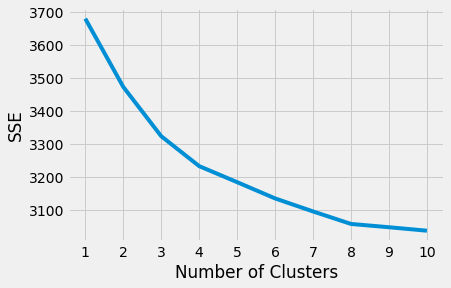

In [37]:
elbow_kplot(desserts_matrix)

In [38]:
elbow_kvalue(desserts_matrix)

4

### Silhouette Score for Optimal K

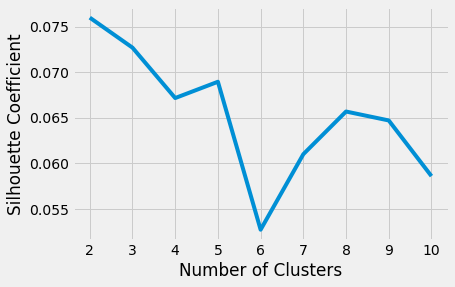

In [39]:
silhouette_plot(desserts_matrix)

### K-Means Cluster Results

In [40]:
kmeans5 = KMeans(n_clusters=5, random_state=24).fit(desserts_matrix)

In [41]:
from src.models.cluster_items import cluster_5

In [42]:
kmeans_des1, kmeans_des2, kmeans_des3, kmeans_des4, kmeans_des5 = cluster_5(
    desserts_list, kmeans5)

# Hierarchical Clustering

In [43]:
from sklearn.cluster import AgglomerativeClustering

## Appetizers

In [44]:
#ward clustering
hier6 = AgglomerativeClustering(n_clusters=6).fit(appetizers_matrix)

In [45]:
hier_app1, hier_app2, hier_app3, hier_app4, hier_app5, hier_app6 = cluster_6(
    appetizers_list, hier6)

## Entrees

In [46]:
hier4 = AgglomerativeClustering(n_clusters=4).fit(entrees_matrix)

In [47]:
hier_ent1, hier_ent2, hier_ent3, hier_ent4 = cluster_4(entrees_list, hier4)

## Desserts

In [48]:
hier5 = AgglomerativeClustering(n_clusters=5).fit(desserts_matrix)

In [49]:
hier_des1, hier_des2, hier_des3, hier_des4, hier_des5 = cluster_5(
    desserts_list, hier5)

# Recommendation System

## Mystery Basket Generator

In [50]:
import pickle

#pickling each cluster for streamlit use

# pickle.dump(kmeans_app1, open('app1.p', 'wb'))
# pickle.dump(kmeans_app2, open('app2.p', 'wb'))
# pickle.dump(kmeans_app3, open('app3.p', 'wb'))
# pickle.dump(kmeans_app4, open('app4.p', 'wb'))
# pickle.dump(kmeans_app5, open('app5.p', 'wb'))
# pickle.dump(kmeans_app6, open('app6.p', 'wb'))
# pickle.dump(kmeans_ent1, open('ent1.p', 'wb'))
# pickle.dump(kmeans_ent2, open('ent2.p', 'wb'))
# pickle.dump(kmeans_ent3, open('ent3.p', 'wb'))
# pickle.dump(kmeans_ent4, open('ent4.p', 'wb'))
# pickle.dump(kmeans_des1, open('des1.p', 'wb'))
# pickle.dump(kmeans_des2, open('des2.p', 'wb'))
# pickle.dump(kmeans_des3, open('des3.p', 'wb'))
# pickle.dump(kmeans_des4, open('des4.p', 'wb'))
# pickle.dump(kmeans_des5, open('des5.p', 'wb'))

## Similar Ingredient Recommender

In [51]:
#list of all unique ingredients that are available in google_vec database
all_list = appetizers_list + entrees_list + desserts_list
all_list = list(dict.fromkeys(all_list))
len(all_list)

1344

In [52]:
#dataframe of word2vec dimension for each unique ingredient
all_matrix = dimensions(all_list)
len(all_matrix)

1344

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
#adding ingredient names to matrix
all_matrix.insert(0, "index", all_list)
all_matrix.set_index('index', inplace=True)

In [55]:
#cosine similarity scores for each unique ingredient
cos_similarity = pd.DataFrame(cosine_similarity(all_matrix), columns=all_list)
cos_similarity.insert(0, "index", all_list)
cos_similarity.set_index('index', inplace=True)

In [56]:
cos_similarity.head()

,bok_choy,oyster_sauce,smoked_paprika,tomato_paste,prosciutto,lump_crab_meat,dried_shiitake_mushrooms,pink_grapefruit,bran_cereal,wonton_wrappers,...,candelabra,camel_milk,witches_brew,yogurt,cranberry_chutney,caramel_apples,muscat_grapes,bundt_cake,cabernet_sauvignon,cajeta
index,,,,,,,,,,,,,,,,,,,,,
bok_choy,1.000000,0.652596,0.527747,0.411653,0.467086,0.559955,0.541843,0.410777,0.336392,0.575867,...,0.211189,0.181874,0.164869,0.425637,0.520611,0.264628,0.433417,0.332231,0.269449,0.419330
oyster_sauce,0.652596,1.000000,0.713752,0.507635,0.547383,0.672416,0.651032,0.529316,0.432451,0.592763,...,0.296631,0.193425,0.239252,0.444819,0.653198,0.287645,0.541028,0.475547,0.346358,0.564419
smoked_paprika,0.527747,0.713752,1.000000,0.515285,0.598436,0.644022,0.599994,0.561299,0.435418,0.574066,...,0.305282,0.189027,0.298218,0.441839,0.639693,0.325311,0.565828,0.553101,0.388078,0.655580
tomato_paste,0.411653,0.507635,0.515285,1.000000,0.456423,0.437344,0.461157,0.354029,0.397287,0.490774,...,0.199995,0.307444,0.190081,0.500089,0.399783,0.191288,0.416426,0.346517,0.259674,0.415387
prosciutto,0.467086,0.547383,0.598436,0.456423,1.000000,0.602564,0.424876,0.435220,0.348918,0.533335,...,0.262865,0.170565,0.097854,0.379101,0.555650,0.314595,0.458975,0.460843,0.455986,0.479451


In [57]:
#pickle cosine similarity matrix for streamlit use

#pickle.dump(cos_similarity, open('cos_similarity.p', 'wb'))

# Data Visualization

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
def silhouette_coef(matrix):
    """
    input: matrix of word2vec dimensions
    output: list of silhouette coefficients
    """

    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 24,
    }

    # a list holds the silhouette coefficients for each k
    silhouette_coefficients = []

    # start at 2 clusters for silhouette coefficient
    for k in range(2, 11):
        kmeans_silhouette = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans_silhouette.fit(matrix)
        score = silhouette_score(matrix, kmeans_silhouette.labels_)
        silhouette_coefficients.append(score)

    return silhouette_coefficients

In [60]:
app_coeffs = silhouette_coef(appetizers_matrix)
ent_coeffs = silhouette_coef(entrees_matrix)
des_coeffs = silhouette_coef(desserts_matrix)

Text(0.5, 1.0, 'Dessert')

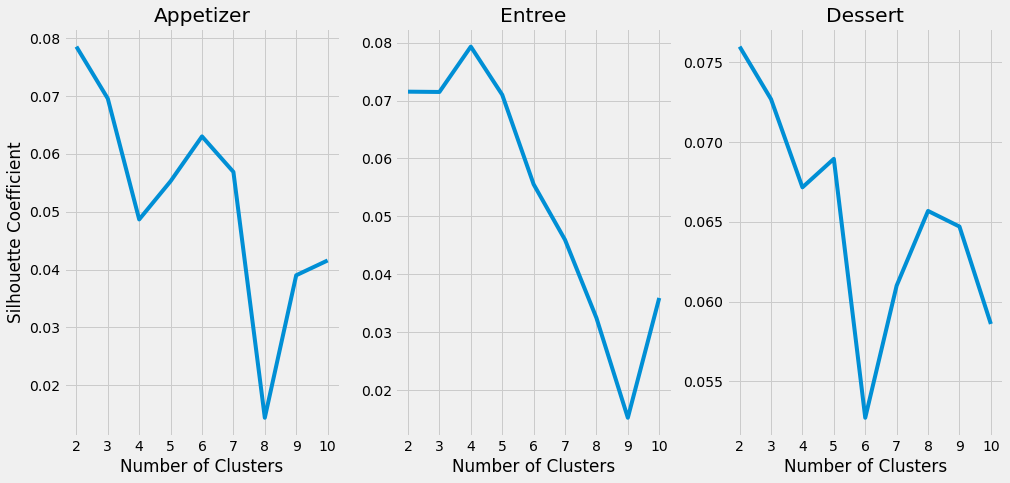

In [61]:
#all three silhouette coefficient plots together
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.plot(range(2, 11), app_coeffs)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Appetizer')

plt.subplot(1, 3, 2)
plt.plot(range(2, 11), ent_coeffs)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.title('Entree')

plt.subplot(1, 3, 3)
plt.plot(range(2, 11), des_coeffs)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.title('Dessert')

#plt.savefig('all_silhouette.png', dpi=400)